# Análise dos investidores do tesouro direto 

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [3]:
## Importação dos dados do site tesourotransparente.gov
table_chunk = pd.read_csv("https://www.tesourotransparente.gov.br/ckan/dataset/48a7fd9d-78e5-43cb-bcba-6e7dcaf2d741/resource/0fd2ac86-4673-46c0-a889-b46224ade563/download/InvestidoresTesouroDireto.csv",
sep=';', encoding='cp1252', chunksize=10000, iterator=True)

In [4]:
df = pd.concat(table_chunk, ignore_index=True)

In [5]:
## Checando a existência de valores nulos
df.isnull().sum()

Codigo do Investidor    0
Data de Adesao          0
Estado Civil            0
Genero                  0
Profissao               0
Idade                   0
UF do Investidor        0
Cidade do Investidor    0
Pais do Investidor      0
Situacao da Conta       0
Operou 12 Meses         0
dtype: int64

In [6]:
## Fomatos de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10306900 entries, 0 to 10306899
Data columns (total 11 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Codigo do Investidor  int64 
 1   Data de Adesao        object
 2   Estado Civil          object
 3   Genero                object
 4   Profissao             object
 5   Idade                 int64 
 6   UF do Investidor      object
 7   Cidade do Investidor  object
 8   Pais do Investidor    object
 9   Situacao da Conta     object
 10  Operou 12 Meses       object
dtypes: int64(2), object(9)
memory usage: 865.0+ MB


In [7]:
## Reduzir o uso de memória
df['Codigo do Investidor'] = df["Codigo do Investidor"].astype("int32")
df['Idade'] = df['Idade'].astype("int32")

In [8]:
df['Pais do Investidor'].value_counts()

BRASIL    10306900
Name: Pais do Investidor, dtype: int64

In [9]:
df.drop(["Pais do Investidor"], axis=1, inplace=True)

In [10]:
## Vasculhando investidores repetidos
df["Codigo do Investidor"].value_counts()

444162      23
39094       22
52019       21
563648      19
4440982     19
            ..
5516295      1
5516267      1
5516266      1
5516247      1
12937309     1
Name: Codigo do Investidor, Length: 7295813, dtype: int64

In [11]:
## Vasculhando investidores repetidos
df[df["Codigo do Investidor"].map(df["Codigo do Investidor"].value_counts()) > 20]

,Codigo do Investidor,Data de Adesao,Estado Civil,Genero,Profissao,Idade,UF do Investidor,Cidade do Investidor,Situacao da Conta,Operou 12 Meses
598,444162,06/04/2015,Solteiro(a),M,ECONOMISTA,26,SP,SAO PAULO,D,N
659271,444162,24/03/2016,Solteiro(a),M,ECONOMISTA,26,SP,SAO PAULO,D,N
695654,39094,27/07/2015,Divorciado(a),M,SERVIDO PÚBLICO ESTADUAL,56,BA,LAURO DE FREITAS,D,N
700167,52019,30/10/2008,Casado(a) com brasileiro(a) nato(a),M,MÉDICO,72,SP,SAO PAULO,D,N
978216,444162,16/03/2016,Solteiro(a),M,ECONOMISTA,26,SP,SAO PAULO,D,N
...,...,...,...,...,...,...,...,...,...,...
9886405,444162,08/07/2013,Solteiro(a),M,ECONOMISTA,26,SP,SAO PAULO,A,N
9892196,52019,26/11/2014,Casado(a) com brasileiro(a) nato(a),M,MÉDICO,72,SP,SAO PAULO,D,N
9893950,52019,23/06/2009,Casado(a) com brasileiro(a) nato(a),M,MÉDICO,72,SP,SAO PAULO,D,N
9923761,39094,23/12/2005,Divorciado(a),M,SERVIDO PÚBLICO ESTADUAL,56,BA,LAURO DE FREITAS,A,S


In [13]:
## Filtrando apenas os investidores ativos
investidores_ativos = df[df["Situacao da Conta"] == "A"].copy()
investidores_ativos.head()

,Codigo do Investidor,Data de Adesao,Estado Civil,Genero,Profissao,Idade,UF do Investidor,Cidade do Investidor,Situacao da Conta,Operou 12 Meses
91,217072,23/02/2010,Casado(a) com brasileiro(a) nato(a),M,ECONOMISTA,74,SP,SAO PAULO,A,N
388,248812,15/09/2010,Casado(a) com brasileiro(a) nato(a),M,APOSENTADO (EXCETO FUNCIONÁRIO PÚBLICO),80,DF,BRASILIA,A,N
440,260933,03/12/2010,Solteiro(a),F,"VENDEDOR PRACISTA, REPRESENTANTE COMERCIAL, CA...",55,SP,SAO PAULO,A,N
474,267935,11/01/2011,Casado(a) com brasileiro(a) nato(a),M,OUTROS,52,SP,SAO PAULO,A,N
491,271331,26/01/2011,Casado(a) com brasileiro(a) nato(a),F,APOSENTADO (EXCETO FUNCIONÁRIO PÚBLICO),77,SP,SANTO ANDRE,A,N


In [14]:
investidores_ativos.drop(['Situacao da Conta'], axis=1, inplace=True)

In [15]:
investidores_ativos.shape

(9206217, 9)

In [16]:
investidores_ativos["Codigo do Investidor"].value_counts()

563648      19
4440982     17
9245356     16
334849      16
1179302     15
            ..
8313902      1
8313897      1
8313892      1
8313889      1
12937309     1
Name: Codigo do Investidor, Length: 6879994, dtype: int64

In [17]:
## Filtrando investidores repetidos
investidores_ativos.drop_duplicates(subset=['Codigo do Investidor'], keep='first', inplace=True)

In [16]:
investidores_ativos['Genero'].value_counts()

M    4744066
F    2135927
N          1
Name: Genero, dtype: int64

In [18]:
investidores_ativos[investidores_ativos["Genero"] == 'N']

,Codigo do Investidor,Data de Adesao,Estado Civil,Genero,Profissao,Idade,UF do Investidor,Cidade do Investidor,Operou 12 Meses
9107280,64232,01/01/1900,Não se aplica,N,Não se aplica,97,SP,SÃO PAULO,N


In [19]:
investidores_ativos.drop(9107280, axis=0, inplace=True)

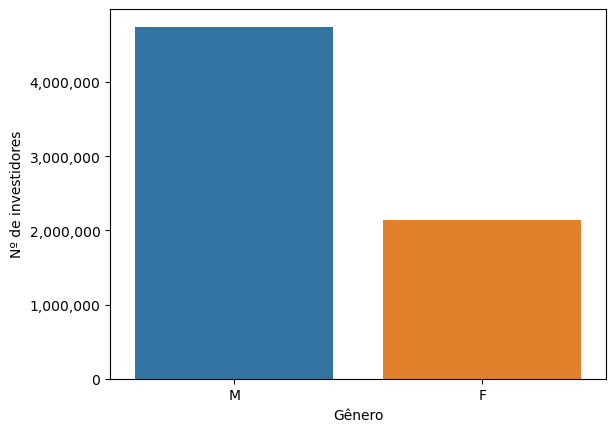

In [20]:
## Investidores por gênero
ax, fig = plt.subplots()
ax = sns.countplot(data = investidores_ativos, x='Genero')
tick = mtick.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(tick)
ax.set_xlabel("Gênero")
ax.set_ylabel("Nº de investidores")
plt.show()

In [21]:
investidores_ativos['Estado Civil'].value_counts()

Solteiro(a)                                    3705942
Casado(a) com brasileiro(a) nato(a)            2399545
Divorciado(a)                                   388040
União estável                                   266202
Viúvo(a)                                         73670
Separado judic.                                  46537
Casado(a) com estrangeiro(a)                        27
Desquitado(a)                                       20
Casado(a) com brasileiro(a) naturalizado(a)         10
Name: Estado Civil, dtype: int64

In [23]:
## Reduzir as categorias da coluna Estado Civil
nova_coluna = []
for n in investidores_ativos['Estado Civil']:
    if n == "Casado(a) com brasileiro(a) nato(a)":
        nova_coluna.append("Casado(a)")
    elif n == "União estável":
        nova_coluna.append("Casado(a)")
    elif n == "Separado judic.":
        nova_coluna.append("Divorciado(a)")
    elif n == "Casado(a) com estrangeiro(a)":
        nova_coluna.append("Casado(a)")
    elif n == "Desquitado(a)":
        nova_coluna.append("Divorciado(a)")
    elif n == "Casado(a) com brasileiro(a) naturalizado(a)":
        nova_coluna.append("Casado(a)")
    else:
        nova_coluna.append(n)

In [24]:
pd.DataFrame(nova_coluna).value_counts()

Solteiro(a)      3705942
Casado(a)        2665784
Divorciado(a)     434597
Viúvo(a)           73670
dtype: int64

In [25]:
investidores_ativos['Estado Civil'] = nova_coluna

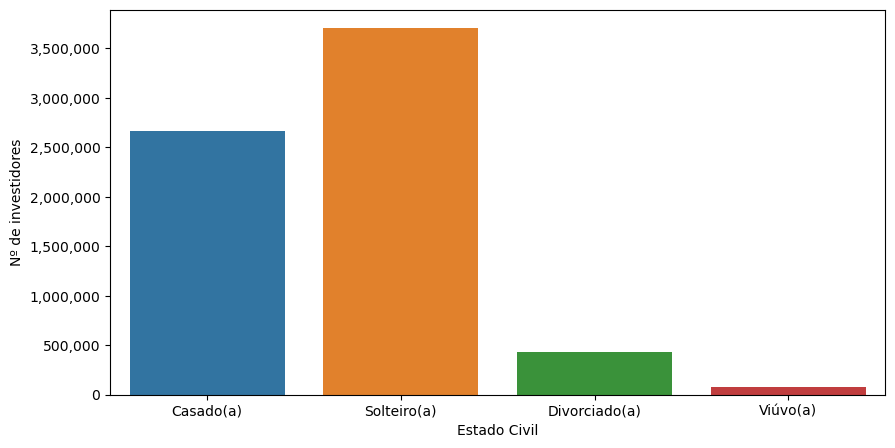

In [26]:
ax, fig = plt.subplots(figsize=(10,5))
ax = sns.countplot(data = investidores_ativos, x="Estado Civil")
tick = mtick.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(tick)
ax.set_ylabel("Nº de investidores")
plt.show()

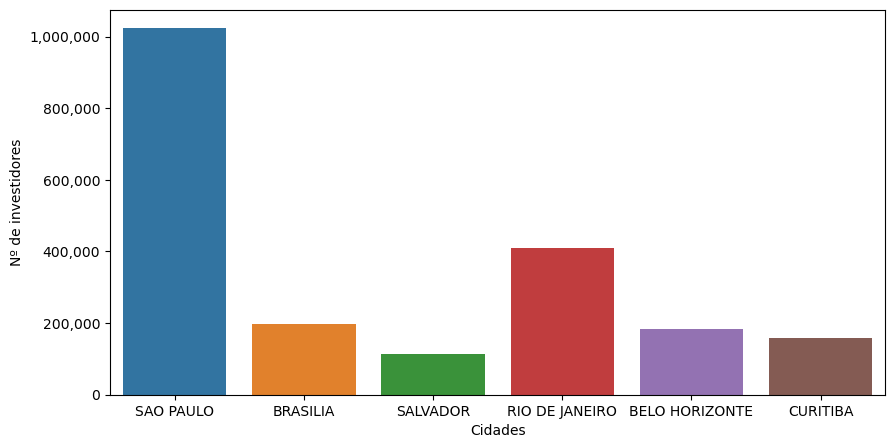

In [27]:
## Principais cidades, com mais de 100.000 investidores
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(data=investidores_ativos[investidores_ativos['Cidade do Investidor'].map(investidores_ativos["Cidade do Investidor"].value_counts()) > 100000],
x="Cidade do Investidor")
tick = mtick.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(tick)
ax.set_xlabel("Cidades")
ax.set_ylabel("Nº de investidores")
plt.show()

In [28]:
investidores_ativos['Profissao'].value_counts()

OUTROS                                                      1766779
ADMINISTRADOR                                                408616
ESTUDANTE                                                    331883
ENGENHEIRO                                                   283915
EMPRESÁRIO                                                   241824
                                                             ...   
MEMBRO DO PODER LEGISLATIVO: SENADOR, DEP.FED.E ESTADUAL        435
JORNALEIRO                                                      377
FALECIDO                                                        314
CONTRAMESTRE DE EMBARCAÇÕES                                     198
TRABALHADOR DE TRATAMENTO DE FUMO E DE FABR. CIGARROS           109
Name: Profissao, Length: 158, dtype: int64

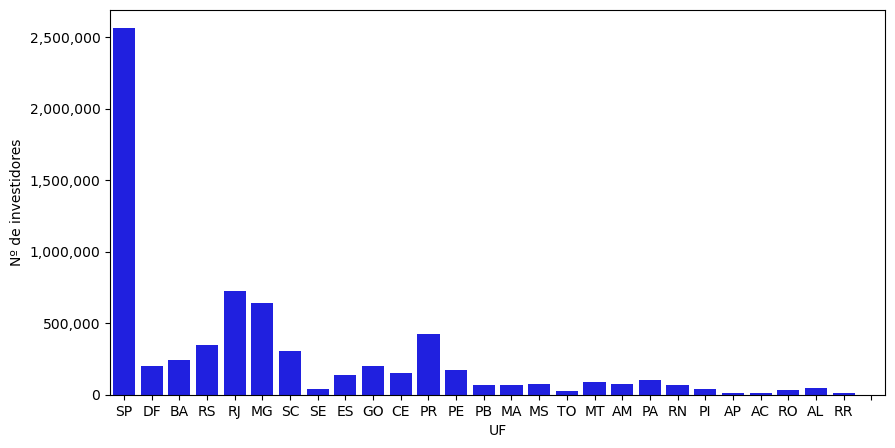

In [29]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(data=investidores_ativos, x="UF do Investidor", color='blue')
tick = mtick.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(tick)
ax.set_xlabel("UF")
ax.set_ylabel("Nº de investidores")
plt.show()

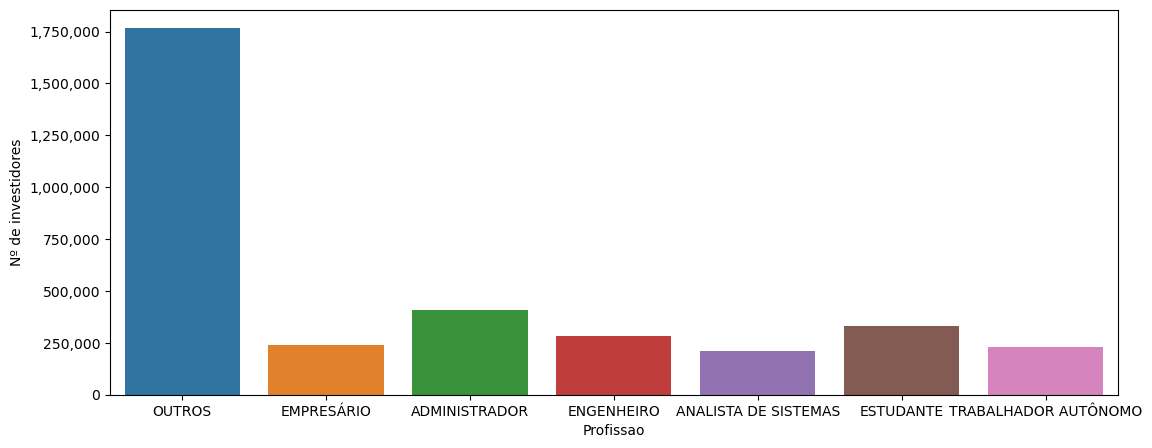

In [30]:
fig, ax = plt.subplots(figsize=(13,5))
ax = sns.countplot(data = investidores_ativos[investidores_ativos['Profissao'].map(investidores_ativos['Profissao'].value_counts()) > 200000],
             x='Profissao')
tick = mtick.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(tick)
ax.set_ylabel("Nº de investidores")
plt.show()

In [31]:
## Convertendo em data
investidores_ativos['Data de Adesao'] = pd.to_datetime(investidores_ativos['Data de Adesao'])

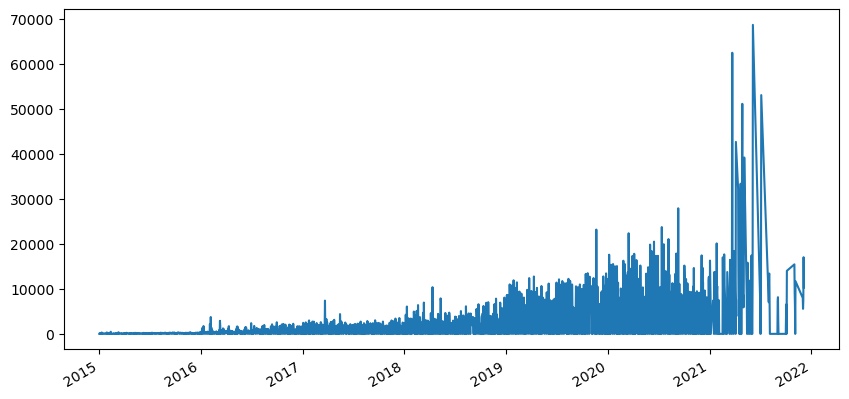

In [32]:
fig, ax = plt.subplots(figsize=(10,5))
investidores_ativos[investidores_ativos['Data de Adesao'] > '2015']['Data de Adesao'].value_counts().plot()
plt.show()